In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "6"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:128"
import torch
from sema_guidance import StableDiffusionFreeGuidancePipeline
# from sema_guidance import StableDiffusionFreeGuidancePipeline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import torchvision.transforms.functional as TF
import torch.nn.functional as F
from tqdm.auto import tqdm
from torch.nn import init
from utils.guidance_functions import *
import argparse
from diffusers import LMSDiscreteScheduler, DDPMScheduler, DDIMScheduler, DPMSolverMultistepScheduler
from utils import *
from PIL import Image
torch.cuda.manual_seed_all(1234) 
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
mpl.rcParams['image.cmap'] = 'gray_r'


/root/anaconda3/envs/free_guide/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

print("Start Inference!")
model_id = "runwayml/stable-diffusion-v1-5"
device = "cuda"
NUM_DDIM_STEPS = 50
pipe = StableDiffusionFreeGuidancePipeline.from_pretrained(model_id, torch_dtype=torch.float16, variant="fp16")
pipe.unet = UNetDistributedDataParallel(pipe.unet, device_ids=[0]).cuda()
# pipe.vae = UNetDistributedDataParallel(pipe.vae, device_ids=[0,1,2]).cuda()
# pipe.text_encoder = UNetDistributedDataParallel(pipe.text_encoder, device_ids=[0,1,2]).cuda()
# pipe.unet = pipe.unet.to(device)
# pipe.text_encoder = UNetDistributedDataParallel(pipe.text_encoder, device_ids=[0,1,2,3,4], output_device=3).cuda()
# pipe.unet.config, pipe.unet.dtype, pipe.unet.attn_processors, pipe.unet.set_attn_processor = pipe.unet.module.config, pipe.unet.module.dtype, pipe.unet.module.attn_processors, pipe.unet.module.set_attn_processor
# pipe.unet.config, pipe.unet.dtype = pipe.unet.module.config, pipe.unet.module.dtype
pipe.unet = pipe.unet.module
pipe = pipe.to(device)

# pipe.scheduler = DDPMScheduler.from_config(pipe.scheduler.config)
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config) # DDPMScheduler -> DDIMScheduler
pipe.scheduler.set_timesteps(NUM_DDIM_STEPS)

pipe.enable_attention_slicing()
torch.backends.cudnn.benchmark = True

Start Inference!


Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]


Model loaded successfully!


cross_attention dimension
down_blocks：
4096 4096
1024 1024
256 256
mid：
64
up_block：
256 256 256
1024 1024 1024
4096 4096 4096
res activation
down_blocks：
layer1 (1,320,64,64)
layer2 (1,640,32,32)
layer3 (1,1280,16,16)
layer4 (1,1280,8,8)
up_block：
layer1 (1,1280,8,8)
layer2 (1,1280,16,16)
layer3 (1,640,32,32)
layer4 (1,320,64,64)

13519


  0%|          | 0/50 [00:00<?, ?it/s]/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:188: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()


tensor(0.15, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(5.20, device='cuda:0') tensor(0.78, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.02, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.22, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(14.94, device='cuda:0') tensor(0.89, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.16, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.20, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(14.80, device='cuda:0') tensor(0.99, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.14, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.20, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(15.58, device='cuda:0') tensor(0.92, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.12, device='cuda:0', grad_fn=<MulBackward0>)


  2%|▏         | 1/50 [00:47<38:28, 47.11s/it]

tensor(0.20, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(15.98, device='cuda:0') tensor(0.91, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.10, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.17, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(19.30, device='cuda:0') tensor(0.64, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.08, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.17, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.43, device='cuda:0') tensor(0.61, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.17, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.62, device='cuda:0') tensor(0.61, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.17, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(17.44, device='cuda:0') tensor(0.60, device='cuda:0', grad_fn=

  4%|▍         | 2/50 [00:49<16:40, 20.85s/it]

tensor(0.15, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.42, device='cuda:0') tensor(0.40, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.04, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.15, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.93, device='cuda:0') tensor(0.33, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.04, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.15, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.02, device='cuda:0') tensor(0.32, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.04, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.15, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.50, device='cuda:0') tensor(0.32, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.04, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.15, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(24.02, device='cuda:0') tensor(0.32, device='cuda:0', grad_fn=

  6%|▌         | 3/50 [00:52<09:53, 12.63s/it]

tensor(0.14, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(23.93, device='cuda:0') tensor(0.30, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.04, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.14, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(23.37, device='cuda:0') tensor(0.26, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.04, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.14, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(23.54, device='cuda:0') tensor(0.26, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.04, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.14, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(23.39, device='cuda:0') tensor(0.22, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.14, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(24.10, device='cuda:0') tensor(0.20, device='cuda:0', grad_fn=

  8%|▊         | 4/50 [00:54<06:25,  8.37s/it]

tensor(0.14, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.35, device='cuda:0') tensor(0.21, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.04, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(23.29, device='cuda:0') tensor(0.21, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.13, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(25.67, device='cuda:0') tensor(0.18, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.13, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(24.69, device='cuda:0') tensor(0.14, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.13, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(23.92, device='cuda:0') tensor(0.16, device='cuda:0', grad_fn=

 10%|█         | 5/50 [00:56<04:30,  6.02s/it]

tensor(0.13, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(23.23, device='cuda:0') tensor(0.18, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.80, device='cuda:0') tensor(0.09, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.07, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(24.15, device='cuda:0') tensor(0.12, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.71, device='cuda:0') tensor(0.12, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.18, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(24.88, device='cuda:0') tensor(0.17, device='cuda:0', grad_fn=

 12%|█▏        | 6/50 [00:58<03:26,  4.70s/it]

tensor(0.18, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(26.99, device='cuda:0') tensor(0.47, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.13, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(25.44, device='cuda:0') tensor(0.27, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.14, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(25.18, device='cuda:0') tensor(0.26, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.07, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.30, device='cuda:0') tensor(0.19, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.11, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(19.50, device='cuda:0') tensor(0.24, device='cuda:0', grad_fn=

 14%|█▍        | 7/50 [01:00<02:40,  3.74s/it]

tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.95, device='cuda:0') tensor(0.18, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.11, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(24.45, device='cuda:0') tensor(0.21, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.11, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(19.94, device='cuda:0') tensor(0.14, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.11, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(19.26, device='cuda:0') tensor(0.20, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.11, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.56, device='cuda:0') tensor(0.07, device='cuda:0', grad_fn=

 16%|█▌        | 8/50 [01:01<02:10,  3.11s/it]

tensor(0.11, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(26.08, device='cuda:0') tensor(0.18, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.10, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(26.24, device='cuda:0') tensor(0.07, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.07, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(25.08, device='cuda:0') tensor(0.13, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(26.01, device='cuda:0') tensor(0.07, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.08, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.30, device='cuda:0') tensor(0.13, device='cuda:0', grad_fn=

 18%|█▊        | 9/50 [01:03<01:50,  2.71s/it]

tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(24.14, device='cuda:0') tensor(0.08, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.07, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.11, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(23.01, device='cuda:0') tensor(0.07, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.08, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.11, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.08, device='cuda:0') tensor(0.17, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.11, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.02, device='cuda:0') tensor(0.08, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.07, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.11, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.18, device='cuda:0') tensor(0.18, device='cuda:0', grad_fn=

 20%|██        | 10/50 [01:05<01:38,  2.45s/it]

tensor(0.10, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(23.34, device='cuda:0') tensor(0.15, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.10, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.77, device='cuda:0') tensor(0.08, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.10, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.78, device='cuda:0') tensor(0.19, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.09, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.49, device='cuda:0') tensor(0.19, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.10, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.54, device='cuda:0') tensor(0.08, device='cuda:0', grad_fn=

 22%|██▏       | 11/50 [01:07<01:28,  2.27s/it]

tensor(0.10, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.90, device='cuda:0') tensor(0.10, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.07, device='cuda:0', grad_fn=<MulBackward0>)


 24%|██▍       | 12/50 [01:08<01:11,  1.89s/it]

tensor(0.11, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.53, device='cuda:0') tensor(0.16, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.07, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.10, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(19.07, device='cuda:0') tensor(0.38, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.10, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.07, device='cuda:0') tensor(0.25, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.09, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(18.23, device='cuda:0') tensor(0.35, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 26%|██▌       | 13/50 [01:10<01:17,  2.09s/it]

tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.25, device='cuda:0') tensor(0.13, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)


 28%|██▊       | 14/50 [01:12<01:07,  1.86s/it]

tensor(0.10, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.18, device='cuda:0') tensor(0.18, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.10, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.11, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.07, device='cuda:0') tensor(0.09, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.09, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.09, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(16.25, device='cuda:0') tensor(0.42, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.09, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.74, device='cuda:0') tensor(0.09, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.10, device='cuda:0', grad_fn=<MulBackward0>)


 30%|███       | 15/50 [01:14<01:13,  2.10s/it]

tensor(0.09, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.58, device='cuda:0') tensor(0.08, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.09, device='cuda:0', grad_fn=<MulBackward0>)


 32%|███▏      | 16/50 [01:16<01:01,  1.80s/it]

tensor(0.09, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.51, device='cuda:0') tensor(0.22, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.48, device='cuda:0') tensor(0.13, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(25.32, device='cuda:0') tensor(0.10, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(23.68, device='cuda:0') tensor(0.09, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)


 34%|███▍      | 17/50 [01:18<01:07,  2.04s/it]

tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.63, device='cuda:0') tensor(0.08, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)


 36%|███▌      | 18/50 [01:19<00:56,  1.77s/it]

tensor(0.13, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(23.19, device='cuda:0') tensor(0.09, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.13, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.10, device='cuda:0') tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.07, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.10, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.85, device='cuda:0') tensor(0.10, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.96, device='cuda:0') tensor(0.07, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)


 38%|███▊      | 19/50 [01:22<01:02,  2.02s/it]

tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.49, device='cuda:0') tensor(0.11, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)


 40%|████      | 20/50 [01:23<00:52,  1.76s/it]

tensor(0.13, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.13, device='cuda:0') tensor(0.23, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.09, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.06, device='cuda:0') tensor(0.14, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.09, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.68, device='cuda:0') tensor(0.12, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(23.61, device='cuda:0') tensor(0.11, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 42%|████▏     | 21/50 [01:26<00:58,  2.02s/it]

tensor(0.09, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(23.74, device='cuda:0') tensor(0.13, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 44%|████▍     | 22/50 [01:27<00:48,  1.75s/it]

tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.96, device='cuda:0') tensor(0.09, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.07, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.13, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(19.10, device='cuda:0') tensor(0.11, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.11, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.81, device='cuda:0') tensor(0.10, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.10, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.54, device='cuda:0') tensor(0.11, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)


 46%|████▌     | 23/50 [01:29<00:54,  2.01s/it]

tensor(0.09, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.14, device='cuda:0') tensor(0.09, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)


 48%|████▊     | 24/50 [01:31<00:45,  1.74s/it]

tensor(0.09, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(19.70, device='cuda:0') tensor(0.10, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(19.58, device='cuda:0') tensor(0.18, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.55, device='cuda:0') tensor(0.09, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.46, device='cuda:0') tensor(0.15, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 50%|█████     | 25/50 [01:33<00:50,  2.01s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.29, device='cuda:0') tensor(0.11, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)


 52%|█████▏    | 26/50 [01:34<00:41,  1.75s/it]

tensor(0.09, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.56, device='cuda:0') tensor(0.07, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.07, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.95, device='cuda:0') tensor(0.21, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.20, device='cuda:0') tensor(0.11, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(19.97, device='cuda:0') tensor(0.20, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 54%|█████▍    | 27/50 [01:37<00:46,  2.01s/it]

tensor(0.09, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.22, device='cuda:0') tensor(0.08, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)


 56%|█████▌    | 28/50 [01:38<00:38,  1.74s/it]

tensor(0.11, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.23, device='cuda:0') tensor(0.12, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.78, device='cuda:0') tensor(0.09, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.07, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.59, device='cuda:0') tensor(0.08, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.07, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.38, device='cuda:0') tensor(0.11, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)


 58%|█████▊    | 29/50 [01:41<00:42,  2.01s/it]

tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.00, device='cuda:0') tensor(0.14, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 60%|██████    | 30/50 [01:42<00:34,  1.75s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.09, device='cuda:0') tensor(0.13, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.82, device='cuda:0') tensor(0.17, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.11, device='cuda:0') tensor(0.17, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.83, device='cuda:0') tensor(0.17, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 62%|██████▏   | 31/50 [01:44<00:38,  2.00s/it]

tensor(0.09, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.66, device='cuda:0') tensor(0.16, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 64%|██████▍   | 32/50 [01:45<00:31,  1.74s/it]

tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.14, device='cuda:0') tensor(0.24, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(23.23, device='cuda:0') tensor(0.19, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.55, device='cuda:0') tensor(0.23, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.10, device='cuda:0') tensor(0.25, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)


 66%|██████▌   | 33/50 [01:48<00:34,  2.00s/it]

tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.74, device='cuda:0') tensor(0.28, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 68%|██████▊   | 34/50 [01:49<00:27,  1.74s/it]

tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.84, device='cuda:0') tensor(0.21, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.94, device='cuda:0') tensor(0.19, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.47, device='cuda:0') tensor(0.19, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.67, device='cuda:0') tensor(0.26, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 70%|███████   | 35/50 [01:52<00:29,  2.00s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.37, device='cuda:0') tensor(0.21, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 72%|███████▏  | 36/50 [01:53<00:24,  1.74s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(24.59, device='cuda:0') tensor(0.24, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(23.26, device='cuda:0') tensor(0.20, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(24.42, device='cuda:0') tensor(0.18, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(23.13, device='cuda:0') tensor(0.20, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 74%|███████▍  | 37/50 [01:56<00:26,  2.00s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(22.60, device='cuda:0') tensor(0.28, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 76%|███████▌  | 38/50 [01:57<00:20,  1.74s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.14, device='cuda:0') tensor(0.29, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.68, device='cuda:0') tensor(0.23, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.65, device='cuda:0') tensor(0.24, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.24, device='cuda:0') tensor(0.16, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 78%|███████▊  | 39/50 [01:59<00:22,  2.00s/it]

tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(21.36, device='cuda:0') tensor(0.21, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 80%|████████  | 40/50 [02:00<00:17,  1.74s/it]

tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.39, device='cuda:0') tensor(0.15, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(19.70, device='cuda:0') tensor(0.14, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(17.99, device='cuda:0') tensor(0.13, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(18.63, device='cuda:0') tensor(0.16, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 82%|████████▏ | 41/50 [02:03<00:18,  2.00s/it]

tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.40, device='cuda:0') tensor(0.21, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 84%|████████▍ | 42/50 [02:04<00:13,  1.73s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(17.86, device='cuda:0') tensor(0.12, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.57, device='cuda:0') tensor(0.22, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.04, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(19.10, device='cuda:0') tensor(0.13, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(19.62, device='cuda:0') tensor(0.14, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 86%|████████▌ | 43/50 [02:07<00:13,  1.99s/it]

tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(18.13, device='cuda:0') tensor(0.16, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 88%|████████▊ | 44/50 [02:08<00:10,  1.74s/it]

tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(18.41, device='cuda:0') tensor(0.09, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.06, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.32, device='cuda:0') tensor(0.12, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(19.32, device='cuda:0') tensor(0.09, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(20.27, device='cuda:0') tensor(0.14, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 90%|█████████ | 45/50 [02:11<00:10,  2.01s/it]

tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(19.28, device='cuda:0') tensor(0.14, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


 92%|█████████▏| 46/50 [02:12<00:06,  1.75s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(17.33, device='cuda:0') tensor(0.09, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:188: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(17.73, device='cuda:0') tensor(0.08, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:188: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(17.48, device='cuda:0') tensor(0.14, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:188: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(18.74, device='cuda:0') tensor(0.11, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:188: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
 94%|█████████▍| 47/50 [02:21<00:11,  3.89s/it]

tensor(0.12, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(17.39, device='cuda:0') tensor(0.11, device='cuda:0', grad_fn=<MulBackward0>) tensor(0.05, device='cuda:0', grad_fn=<MulBackward0>)


100%|██████████| 50/50 [02:25<00:00,  2.91s/it]
/root/anaconda3/envs/free_guide/lib/python3.9/site-packages/diffusers/pipelines/stable_diffusion_attend_and_excite/pipeline_stable_diffusion_attend_and_excite.py:498: FutureWarning: The decode_latents method is deprecated and will be removed in 1.0.0. Please use VaeImageProcessor.postprocess(...) instead
  deprecate("decode_latents", "1.0.0", deprecation_message, standard_warn=False)


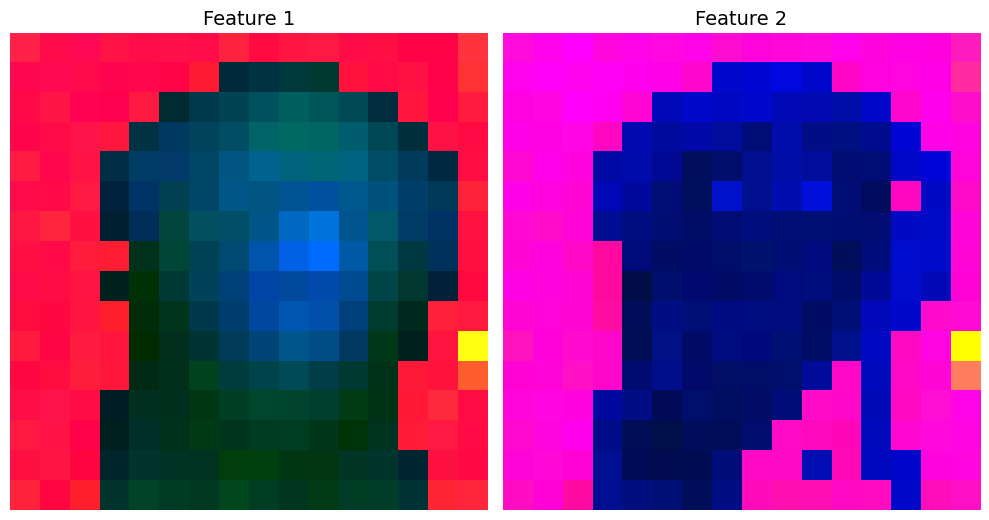

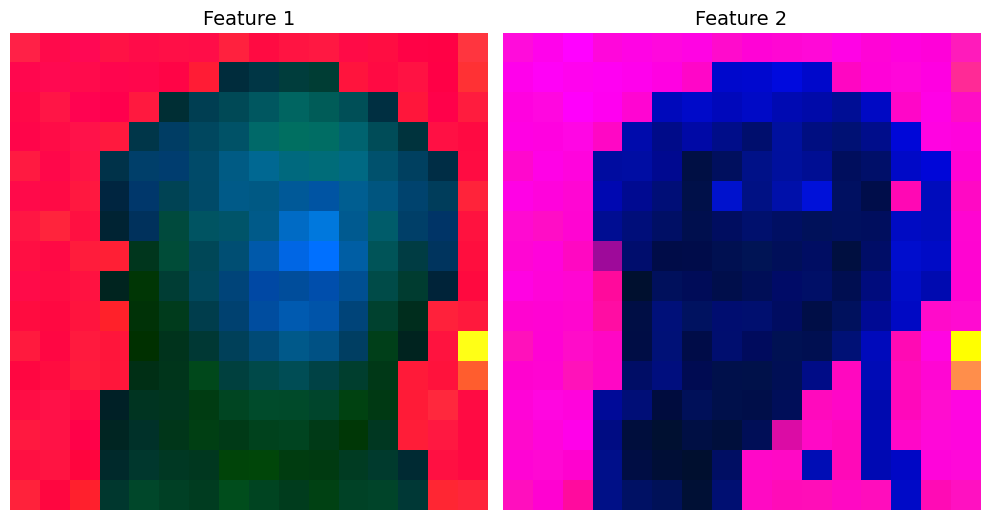

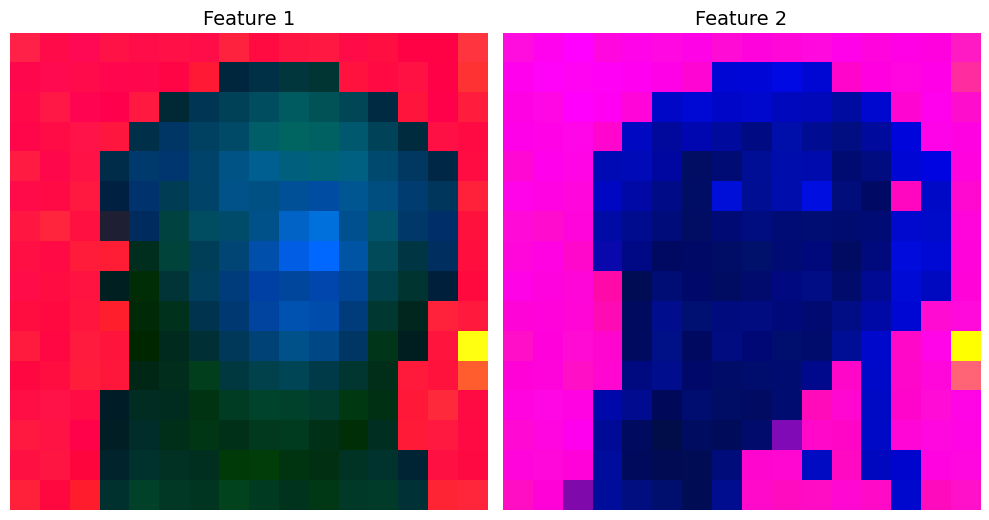

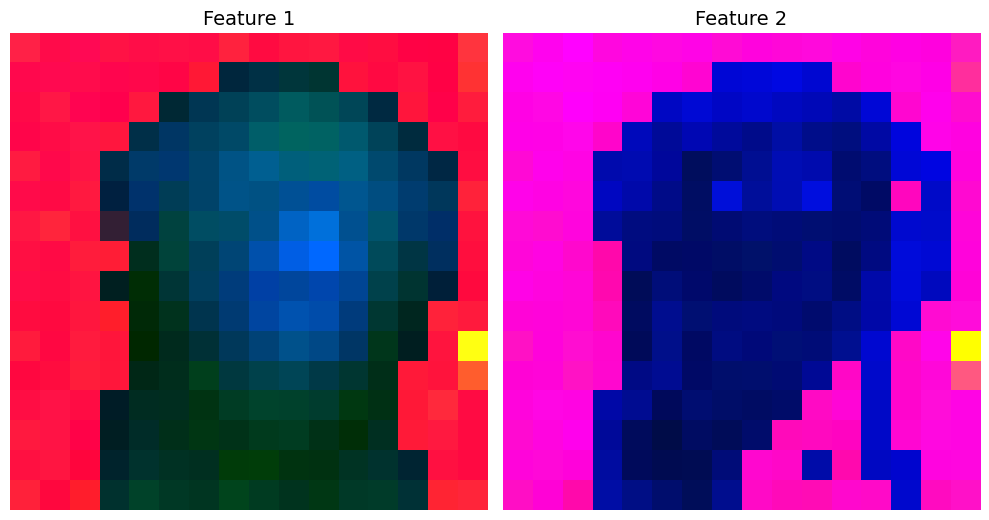

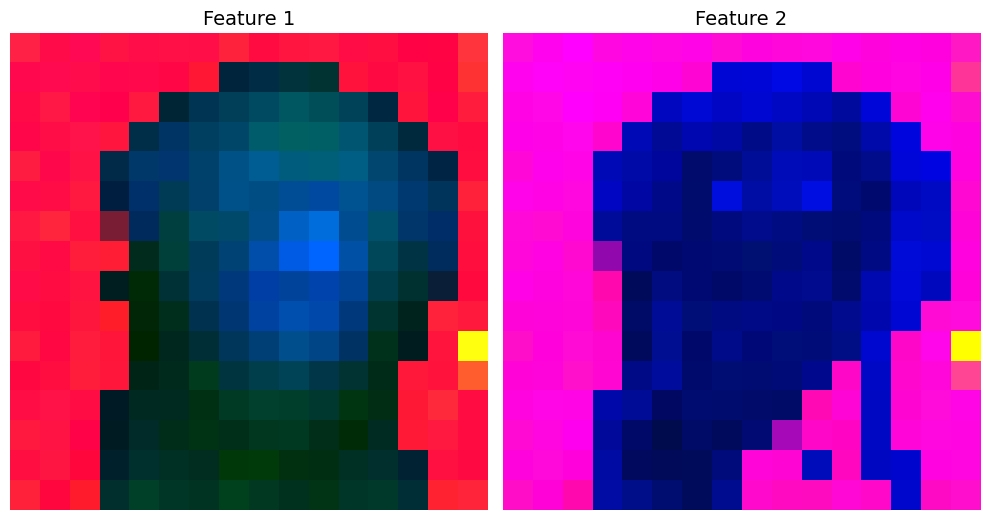

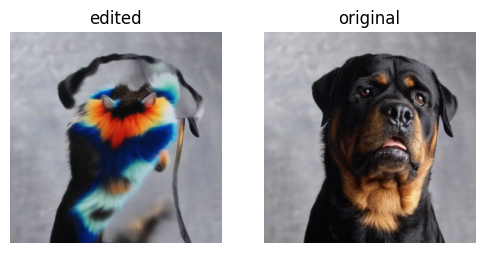

In [3]:
seed = 13519 #int(torch.rand((1,)) * 100000) #13519
generator=torch.manual_seed(seed)
print(seed)

prompts = ["a photo of a dog", 
           "a photo of a cat"]

object_to_edit = 'cat'

guidance = partial(match_semantic_feature, position_weight=6.0, sem_weight=6.0, fit_weight=4.0, feature_weight=3.0) #feature_weight: 3.0
# move = partial(roll_shape, direction='up', factor=0.0)
# guidance = partial(move_object_by_shape, shape_weight=0.5, appearance_weight=1.5, position_weight=6, tau=move)
feature_layer = pipe.unet.up_blocks[-3].resnets[-1] #resnets: 0 1 2

img_path = './img/dog3.JPEG'
latents = get_ddim_latents(pipe, img_path, prompts[0], device)
init_latent = latents[-1]

image_list = pipe(prompts[1], prompts[0], obj_to_edit = object_to_edit, height=512, width=512, 
                  num_inference_steps=50, generator=generator, latents=init_latent, all_latents=latents,
                  max_guidance_iter_per_step=5, guidance_func=guidance, g_weight=1500, feature_layer=feature_layer) 
show_images([i for i in [image_list[0].images[0], image_list[1].images[0]]], titles=['edited', 'original'], save_orig=True)

In [4]:
seed = int(torch.rand((1,)) * 100000)
generator=torch.manual_seed(seed)
print(seed)

prompt = 'a photo of a donut and a shot of espresso on a table'
object_to_edit = 'donut'
objects = ['donut', 'espresso']
move = partial(roll_shape, direction='up', factor=0.4)
guidance = partial(move_object_by_shape, shape_weight=0.5, appearance_weight=1.5, position_weight=6, tau=move)

img_path = './img/donut.png' 
latents = get_ddim_latents(pipe, img_path, prompt, device)
init_latents = latents[-1]
# init_latents = get_latents_from_image(pipe, img_path, device)

image_list = pipe(prompt, obj_to_edit = object_to_edit, height=512, width=512, 
                  num_inference_steps=50, generator=generator, latents=init_latents, all_latents=latents,
                  max_guidance_iter_per_step=15, guidance_func=guidance, g_weight=3000)
show_images([i for i in [image_list[0].images[0], image_list[1].images[0]]], titles=['edited', 'original'], save_orig=True)

73002


 44%|████▍     | 22/50 [03:02<03:52,  8.29s/it]


KeyboardInterrupt: 

In [ ]:
seed = int(torch.rand((1,)) * 100000)
generator=torch.manual_seed(seed)
print(seed)

prompts = ["a photo of a dog", 
           "a photo of a cat"]

object_to_edit = 'cat'
move = partial(roll_shape, direction='up', factor=0.4)
guidance = partial(move_object_by_shape, shape_weight=0.5, appearance_weight=1.5, position_weight=6, tau=move)

img_path = './img/dog.png'
latents = get_ddim_latents(pipe, img_path, prompts[0], device)
init_latent = latents[-1]

image_list = pipe(prompts[1], prompts[0], obj_to_edit = object_to_edit, height=512, width=512, 
                  num_inference_steps=50, generator=generator, latents=init_latent, all_latents=latents,
                  max_guidance_iter_per_step=15, guidance_func=guidance, g_weight=0)
show_images([i for i in [image_list[0].images[0], image_list[1].images[0]]], titles=['edited', 'original'], save_orig=True)

72388


 28%|██▊       | 14/50 [01:29<03:50,  6.40s/it]


KeyboardInterrupt: 

## Swapping word

In [ ]:
def make_controller(prompts: List[str], is_replace_controller: bool, cross_replace_steps: Dict[str, float], self_replace_steps: float, blend_words=None, equilizer_params=None) -> AttentionControlEdit:
    if blend_words is None:
        lb = None
    else:
        lb = LocalBlend(prompts, blend_word)
    if is_replace_controller:
        controller = AttentionReplace(prompts, NUM_DDIM_STEPS, cross_replace_steps=cross_replace_steps, self_replace_steps=self_replace_steps, local_blend=lb)
    else:
        controller = AttentionRefine(prompts, NUM_DDIM_STEPS, cross_replace_steps=cross_replace_steps, self_replace_steps=self_replace_steps, local_blend=lb)
    if equilizer_params is not None:
        eq = get_equalizer(prompts[1], equilizer_params["words"], equilizer_params["values"])
        controller = AttentionReweight(prompts, NUM_DDIM_STEPS, cross_replace_steps=cross_replace_steps,
                                       self_replace_steps=self_replace_steps, equalizer=eq, local_blend=lb, controller=controller)
    return controller

def run_and_display(prompts, controller, latent=None, run_baseline=False, generator=None, uncond_embeddings=None, verbose=True):
    if run_baseline:
        print("w.o. prompt-to-prompt")
        images, latent = run_and_display(prompts, EmptyControl(), latent=latent, run_baseline=False, generator=generator)
        print("with prompt-to-prompt")
    images, x_t = text2image_ldm_stable(ldm_stable, prompts, controller, latent=latent, num_inference_steps=NUM_DDIM_STEPS, guidance_scale=GUIDANCE_SCALE, generator=generator, uncond_embeddings=uncond_embeddings)
    if verbose:
        ptp_utils.view_images(images)
    return images, x_t

NameError: name 'Dict' is not defined

In [ ]:
prompts = ['a photo of a dog',
           'a photo of a cat'
        ]

cross_replace_steps = {'default_': .8,}
self_replace_steps = .5
blend_word = ((('dog',), ('cat', )))
eq_params = {"words": ("cat",), "values": (2,)}

controller = make_controller(prompts, True, cross_replace_steps, self_replace_steps, blend_word, eq_params)
images, _ = run_and_display(prompts, controller, run_baseline=False, latent=x_t, uncond_embeddings=uncond_embeddings)

print("Image is highly affected by the self_replace_steps, usually 0.4 is a good default value, but you may want to try the range 0.3,0.4,0.5,0.7 ")